# Variational inference using the finite approximation

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from copy import deepcopy

import VI_algorithms_lib
import valez_finite_VI_lib


# Draw data

In [2]:
# np.random.seed(34134) # cavi works great for this seed
# np.random.seed(5365)
# np.random.seed(234213)
np.random.seed(1343124)

Num_samples = 500 # sample size
D = 2 # dimension
# so X will be a N\times D matrix

K_inf = 3 # take to be large for a good approximation to the IBP

alpha = 10 # IBP parameter

# Parameters to draw A from MVN
sigma_eps = .1 # variance of noise
sigma_A = 100

# generate data
Pi, Z, mu, A, X = valez_finite_VI_lib.generate_data(Num_samples, D, K_inf, sigma_A, sigma_eps, alpha)

K_approx = deepcopy(K_inf) # variational truncation
print(Pi)

[ 0.9689778   0.85366186  0.93957109]


In [3]:
VI_instance = VI_algorithms_lib.VI_algorithms(X, K_approx, alpha, sigma_eps, sigma_A)

# Run CAVI with random restarts

In [4]:
n_restart = 20
elbo_end = np.array([])

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    [tau_tmp, nu_tmp, phi_mu_tmp, phi_var_tmp, elbo] \
        = VI_instance.run_cavi(max_iter=200, tol=1e-6, verbose = False) # run cavi
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))
#print(elbo_end)
#print(np.argmax(elbo_end))

elbo converged:  480876.784511
elbo converged:  480527.193902
elbo converged:  480660.496314
elbo converged:  479146.455429
elbo converged:  480849.285434
elbo converged:  482378.254463
elbo converged:  488665.074813
elbo converged:  474475.866528
elbo converged:  479782.202846
Max iteration reached; elbo:  458239.887806
elbo converged:  481927.519302
elbo converged:  478912.606098
elbo converged:  488665.074813
elbo converged:  482378.254463
Max iteration reached; elbo:  481347.152656
elbo converged:  482378.254463
Max iteration reached; elbo:  481347.159066
elbo converged:  488665.074813
elbo converged:  479782.202846
elbo converged:  480876.784511
max elbo:  488665.074813
average elbo 480594.079254


Z (unpermuted): 
 [[1 1 0]
 [1 1 1]
 [1 0 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 1]]
permutation:  [1 0 2]
Z (permuted) 
 [[1 1 0]
 [1 1 1]
 [0 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 1]]
round_nu 
 [[ 1.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  1.]]
l1 error (after permutation):  [0.0, 0.77600000000000002, 0.77600000000000002]


true A (permuted): 
 [[ 22.05173952   7.43314472]
 [-13.8492393   11.40791503]
 [  4.2376826  -12.56702396]]
phi_mu: 
 [[ 13.04473887   6.3543641 ]
 [-10.86493126  11.77050344]
 [  2.72165696 -12.76933529]]


true Pi (permuted):  [ 0.9689778   0.85366186  0.93957109]
computed Pi:  [ 0.83740912  0.20290813  0.17911434]


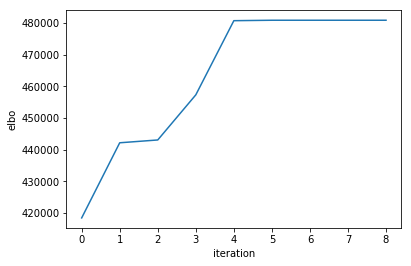

final elbo:  480876.784511


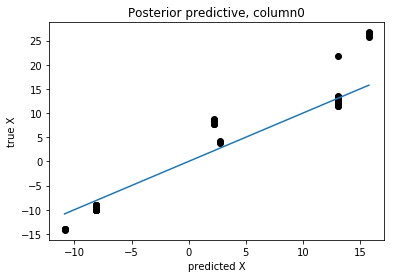

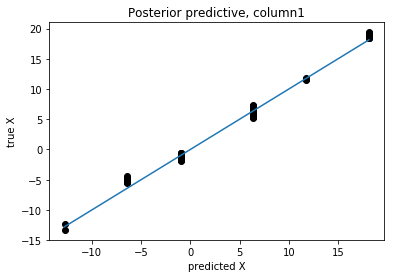

In [5]:
valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, A)

# Run Stochastic VB 

In [ ]:
VI_instance.re_init() # initialize

In [ ]:
n_restart = 20
elbo_end = np.array([])

batch_size = 10

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    
    [tau, nu, phi_mu, phi_var, elbo] = \
        VI_instance.run_stochastic_VI(batch_size, decay_param = 0.9, max_iter=1000, tol=1e-6, verbose = False) 
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))




elbo converged -39.7947980559
Max iteration reached; elbo:  474549.32386
Max iteration reached; elbo:  452615.836575
Max iteration reached; elbo:  453907.198069
Max iteration reached; elbo:  460439.53988
Max iteration reached; elbo:  436625.263604
Max iteration reached; elbo:  445204.870096
Max iteration reached; elbo:  448867.497964
Max iteration reached; elbo:  455234.97502
Max iteration reached; elbo:  447205.226831
Max iteration reached; elbo:  423443.96526
Max iteration reached; elbo:  457181.943907
Max iteration reached; elbo:  445001.862173
Max iteration reached; elbo:  466885.805207
Max iteration reached; elbo:  436737.357869
Max iteration reached; elbo:  469630.757408
Max iteration reached; elbo:  447187.107696
Max iteration reached; elbo:  472673.179234


In [ ]:
valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, A)

# Gultekin: Annealing method

In [ ]:
n_restart = 20
elbo_end = np.array([])

for i in range(n_restart): 
    VI_instance.re_init() # re initialize
    [tau_tmp, nu_tmp, phi_mu_tmp, phi_var_tmp, elbo] \
        = VI_instance.run_cavi_anneal(max_iter=500, tol=1e-6, verbose = False) # run cavi + annealing
        
    elbo_end = np.append(elbo_end, elbo[-1])
    
    # see if posterior predictive is better than all previous ones
    if (i == 0) or np.all(elbo_end[i] > elbo_end[:i]): 
        tau = deepcopy(tau_tmp)
        nu = deepcopy(nu_tmp)
        phi_mu = deepcopy(phi_mu_tmp)
        phi_var = deepcopy(phi_var_tmp)
    
    
print('max elbo: ', np.max(elbo_end))
print('average elbo', np.mean(elbo_end))

valez_finite_VI_lib.display_results(elbo, tau, nu, phi_mu, phi_var, X, Pi, Z, A)